#### main setting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

np.random.seed(4111064232)

#### Dataset

In [4]:
A_ans = np.array([[41110, 64232]])
dimand = 2

n_samples = 1000

# Mean and standard deviation for Gaussian noise
mean = 0
std_dev = 0.1

x_dataset = []

B_with_noise = np.zeros((n_samples, 1))

for i in range(n_samples):
    X = np.random.rand(dimand, 1)
    # print("reshape", X, "\n")
    x_dataset.append(X)
    b = A_ans @ X
    noise = np.random.normal(mean, std_dev)
    B_with_noise[i] = b + noise

# print("X", x_dataset, "\n", "B", B_with_noise)

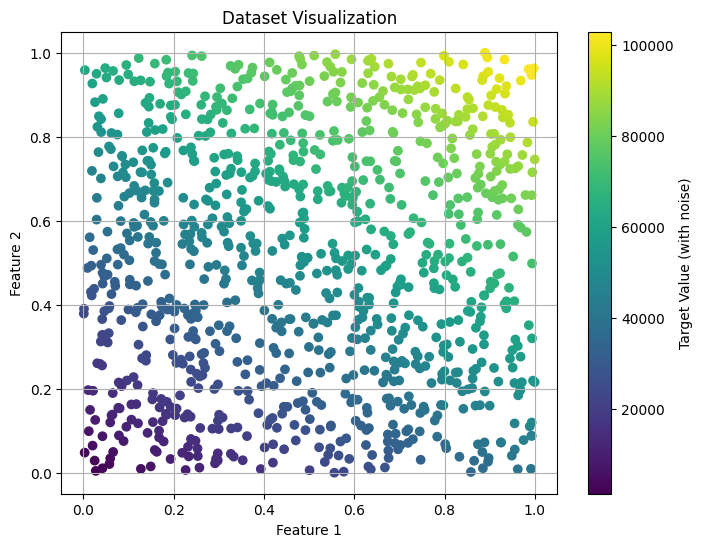

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter([x[0] for x in x_dataset], [x[1] for x in x_dataset], c=B_with_noise, cmap='viridis')
plt.colorbar(label='Target Value (with noise)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset Visualization')
plt.grid(True)
plt.show()


#### batch gradient descent.
eta 7m 55.6s

In [35]:
def batch_objective_function(A, x_dataset, b_dataset):
    total_cost = 0
    for i in range(len(x_dataset)):
        total_cost += 0.5 * np.square(np.dot(A, x_dataset[i]) - b_dataset[i])
    return total_cost / len(x_dataset)

def batch_gradient(A, x_dataset, b_dataset):
    total_grad = np.zeros_like(A, dtype=np.float64)
    for i in range(len(x_dataset)):
        total_grad += (A @ x_dataset[i] - b_dataset[i]) * x_dataset[i].T
    return total_grad / len(x_dataset)

def batch_GD(A, x_dataset, b_dataset, learning_rate = 1.0):
    fooValues = []

    i = 0
    while True:
        grad = batch_gradient(A, x_dataset, b_dataset)

        A_new = A - learning_rate * grad

        fooValues.append(batch_objective_function(A, x_dataset, b_dataset)[0][0])
        # Print progress
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {fooValues[i]}")

        if(np.abs(batch_objective_function(A_new, x_dataset, b_dataset) - batch_objective_function(A, x_dataset, b_dataset)) < 1e-5):
            break

        A = A_new
        i += 1

    filePath = "Batch.data.pickle"
    with open(filePath, 'wb') as f:
        pickle.dump({"A":A, "fooValues":fooValues}, f)

    return A, fooValues

Iteration 0: Cost = 1632161904.1972222
Iteration 100: Cost = 0.40973331898491766
[[41110.01053321 64231.98719321]]


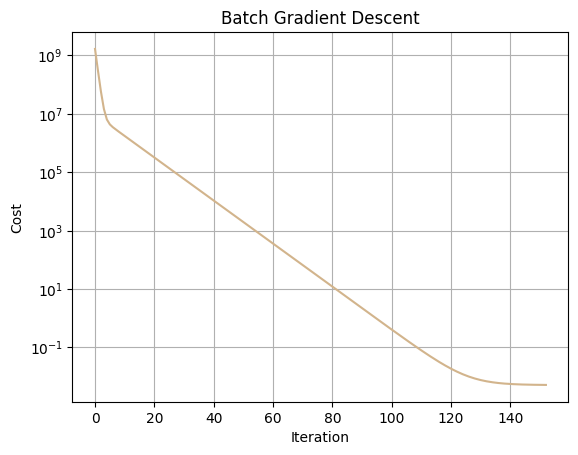

In [36]:
A_initial = np.zeros_like(A_ans, dtype=np.float64)
Batch_GD_A, batch_foo_values = batch_GD(A_initial, x_dataset, B_with_noise)
print(Batch_GD_A)
# filePath = "Batch.data.pickle"
# with open(filePath, 'rb') as f:
#     loadedData = pickle.load(f)
#     Batch_GD_A = loadedData['A']
#     batch_foo_values = loadedData['fooValues']

plt.plot(range(len(batch_foo_values)), batch_foo_values, color="tan")
plt.xlabel('Iteration')
plt.yscale('log')
plt.ylabel('Cost')
plt.title('Batch Gradient Descent')
plt.grid(True)
plt.show()

#### stochastic gradient descent
eta 0.4s

In [25]:
def stochastic_objective_function(A, x, b):
    return 0.5 * np.square(np.dot(A, x) - b)

def stochastic_gradient(A, x, b):
    return (np.dot(A, x) - b) * x.T

def stochastic_GD(A, x_dataset, b_dataset, learning_rate=1.0):
    foo_values = []
    epoch = 0
    letmeout = False
    while True:
        for i in range(len(x_dataset)):
            x = x_dataset[i]
            b = b_dataset[i]

            grad = stochastic_gradient(A, x, b)
            A_new = A - learning_rate * grad
            cost = stochastic_objective_function(A_new , x, b)
            foo_values.append(cost[0][0])
            # Record cost periodically
            if i % 100 == 0:
                print(f"Epoch {epoch}, Iteration {i}: Cost = {cost}")

            if(np.abs(stochastic_objective_function(A_new, x, b) - stochastic_objective_function(A, x, b)) < 1e-5):
                letmeout = True
                break
            A = A_new

        epoch += 1
        if(letmeout):
            break

    return A, foo_values


Epoch 0, Iteration 0: Cost = [[81354550.31586808]]
Epoch 0, Iteration 100: Cost = [[0.00146615]]
[[41110.03090939 64231.881326  ]]


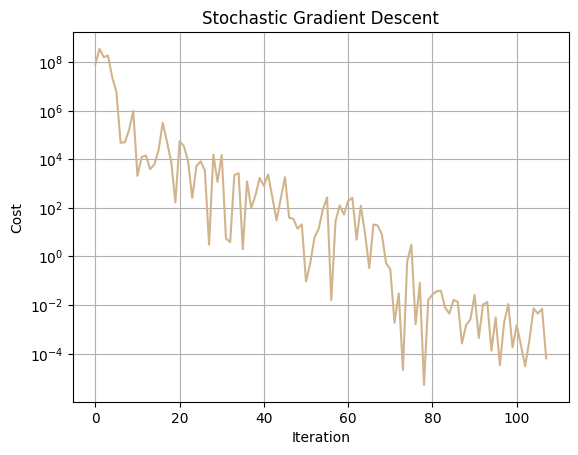

In [26]:
A_initial = np.zeros_like(A_ans, dtype=np.float64)
Stochastic_GD_A, stochastic_foo_values = stochastic_GD(A_initial, x_dataset, B_with_noise)

print(Stochastic_GD_A)

plt.plot(range(len(stochastic_foo_values)), stochastic_foo_values, color="tan")
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.grid(True)
plt.show()

#### Armijo Rule

##### batch gradient descent with armijo rule
eta 8.5s

In [23]:
def batch_objective_function(A, x_dataset, b_dataset):
    total_cost = 0
    for i in range(len(x_dataset)):
        total_cost += 0.5 * np.square(np.dot(A, x_dataset[i]) - b_dataset[i])
    return total_cost / len(x_dataset)

def batch_gradient(A, x_dataset, b_dataset):
    total_grad = np.zeros_like(A, dtype=np.float64)
    for i in range(len(x_dataset)):
        total_grad += (A @ x_dataset[i] - b_dataset[i]) * x_dataset[i].T
    return total_grad / len(x_dataset)

def armijo_rule(A, x_dataset, b_dataset, grad, learning_rate = 1, arimijo_c = 0.5, rho = 2):
    while True:
        A_new = A - learning_rate * grad
        f1 = batch_objective_function(A, x_dataset, b_dataset)
        f2 = batch_objective_function(A_new, x_dataset, b_dataset)
        imp = arimijo_c * learning_rate *  -np.sum(grad**2)
        if f2 > f1 + imp:
            learning_rate /= rho
            break
        learning_rate *= rho
    return learning_rate
def batch_GD_with_armijo(A, x_dataset, b_dataset):
    foo_values = []
    i = 0
    while True:
        grad = batch_gradient(A, x_dataset, b_dataset)
        # Apply Armijo rule to determine the step size
        learning_rate, trial = armijo_rule(A, x_dataset, b_dataset, grad)
        print(learning_rate)
        A_new = A - learning_rate * grad
        # for _ in range(trial):
        foo_values.append(batch_objective_function(A_new, x_dataset, b_dataset)[0][0])

        # Print progress
        # if i % 100 == 0:
        #     print(f"Iteration {i}:", end="")
        #     print(f"Cost = {foo_values[i]}")

        if np.abs(batch_objective_function(A_new, x_dataset, b_dataset) - batch_objective_function(A, x_dataset, b_dataset)) < 1e-5:
            break

        A = A_new
        i += 1

    return A, foo_values

1.0
1.0
1.0
1.0
2.0
8.0
1.0
2.0
8.0
1.0
2.0
8.0
1.0
2.0
8.0
1.0
2.0
8.0
2.0
4.0
2.0
8.0
2.0
4.0
4.0
2.0
8.0
1.0
2.0
8.0
1.0
2.0
8.0
2.0
4.0
[[41109.9955371  64232.00020069]]


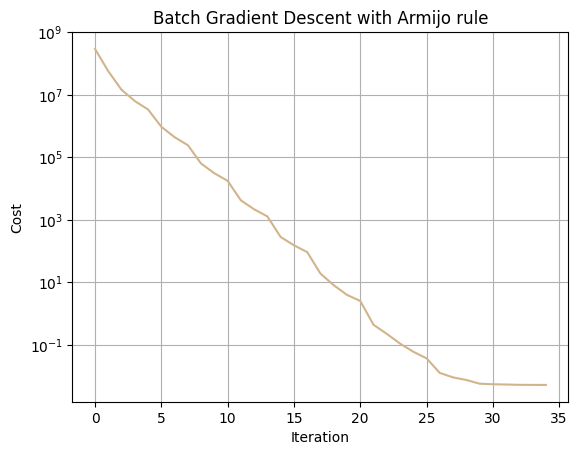

In [24]:
# A initial guess
A_initial = np.zeros_like(A_ans, dtype=np.float64)
Batch_GD_A, batch_foo_values = batch_GD_with_armijo(A_initial, x_dataset, B_with_noise)

print(Batch_GD_A)

plt.plot(range(len(batch_foo_values)), batch_foo_values, color="tan")
plt.xlabel('Iteration')
plt.yscale('log')
plt.ylabel('Cost')
plt.title('Batch Gradient Descent with Armijo rule')
plt.grid(True)
plt.show()

##### stochastic gradient descent with armijo rule
eta 0.1s

In [29]:
def stochastic_objective_function(A, x, b):
    return 0.5 * np.square(np.dot(A, x) - b)

def stochastic_gradient(A, x, b):
    return (np.dot(A, x) - b) * x.T

def armijo_rule(A, x, b, grad, arimijo_c=0.5, rho=0.5, learningRate = 1.0):
    while True:
        f1 = stochastic_objective_function(A, x, b)
        f2 = stochastic_objective_function(A - learningRate * grad, x, b)
        imp = arimijo_c * learningRate * -np.sum(grad**2)
        if f2 <= f1 + imp:
            break
        learningRate *= rho
    return learningRate

def stochastic_GD_with_armijo(A, x_dataset, b_dataset):
    foo_values = []
    epoch = 0
    letmeout = False
    while True:
        for i in range(len(x_dataset)):
            x = x_dataset[i]
            b = b_dataset[i]

            grad = stochastic_gradient(A, x, b)
            # Apply Armijo rule to determine the step size
            t = armijo_rule(A, x, b, grad)
            A_new = A - t * grad

            cost = stochastic_objective_function(A_new , x, b)
            foo_values.append(cost[0][0])
            # Record cost periodically
            if i % 100 == 0:
                print(f"Epoch {epoch}, Iteration {i}: Cost = {cost}")

            if(np.abs(stochastic_objective_function(A_new, x, b) - stochastic_objective_function(A, x, b)) < 1e-5):
                letmeout = True
                break
            A = A_new

        epoch += 1
        if(letmeout):
            break

    return A, foo_values

1
Epoch 0, Iteration 0: Cost = [[81354550.31586808]]
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
2
1
1
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
2
Epoch 0, Iteration 100: Cost = [[0.00140774]]
1
1
1
[[41110.31920049 64231.41589738]]


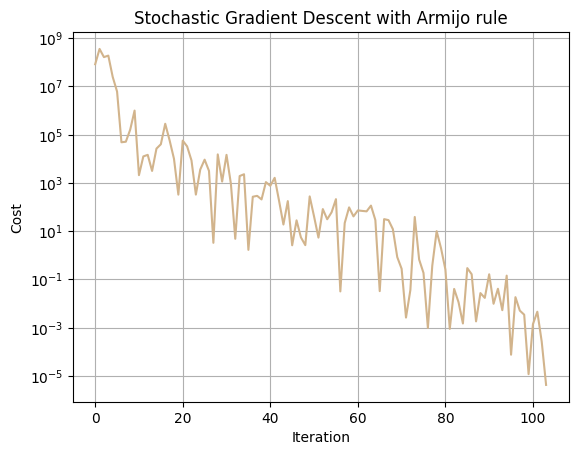

In [30]:
A_initial = np.zeros_like(A_ans, dtype=np.float64)
Stochastic_GD_A, stochastic_foo_values = stochastic_GD_with_armijo(A_initial, x_dataset, B_with_noise)
print(Stochastic_GD_A)

plt.plot(range(len(stochastic_foo_values)), stochastic_foo_values, color="tan")
plt.xlabel('Iteration')
plt.yscale('log')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent with Armijo rule')
plt.grid(True)
plt.show()

#### Newton's method

##### batch gradient descent with Newton's direction

In [41]:
def batch_objective_function(A, x_dataset, b_dataset):
    total_cost = 0
    for i in range(len(x_dataset)):
        total_cost += 0.5 * np.square(np.dot(A, x_dataset[i]) - b_dataset[i])
    return total_cost / len(x_dataset)

def batch_gradient(A, x_dataset, b_dataset):
    total_grad = np.zeros_like(A, dtype=np.float64)
    for i in range(len(x_dataset)):
        total_grad += (A @ x_dataset[i] - b_dataset[i]) * x_dataset[i].T
    return total_grad / len(x_dataset)

def batch_hessian(A, x_dataset):
    hessian = np.zeros((A.shape[0], A.shape[0]))
    for x in x_dataset:
        hessian += x.T @ x
    return hessian / len(x_dataset)

def armijo_rule(A, x_dataset, b_dataset, grad, learning_rate = 10.0, arimijo_c = 0.5, rho = 0.5):
    while True:
        A_new = A - learning_rate * grad
        f1 = batch_objective_function(A, x_dataset, b_dataset)
        f2 = batch_objective_function(A_new, x_dataset, b_dataset)
        imp = arimijo_c * learning_rate *  -np.sum(grad**2)
        if f2 <= f1 + imp:
            break
        learning_rate *= rho
    return learning_rate

def batch_GD_with_armijo(A, x_dataset, b_dataset):
    foo_values = []
    i = 0
    while True:
        grad = batch_gradient(A, x_dataset, b_dataset)
        # Apply Armijo rule to determine the step size
        learning_rate = armijo_rule(A, x_dataset, b_dataset, grad)
        hessian = batch_hessian(A, x_dataset)
        A_new = A - learning_rate * grad * np.linalg.inv(hessian)
        foo_values.append(batch_objective_function(A_new, x_dataset, b_dataset)[0][0])

        # Print progress
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {foo_values[i]}")

        if np.abs(batch_objective_function(A_new, x_dataset, b_dataset) - batch_objective_function(A, x_dataset, b_dataset)) < 1e-5:
            break

        A = A_new
        i += 1

    return A, foo_values

Iteration 0: Cost = 21849401.463135887
[[41109.99394876 64232.001807  ]]


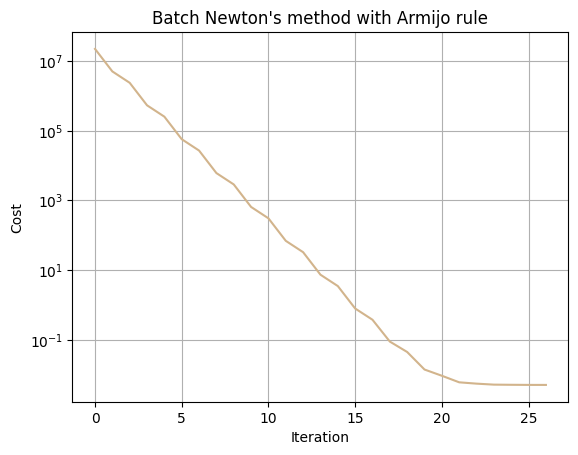

In [42]:
# A initial guess
A_initial = np.zeros_like(A_ans, dtype=np.float64)
Batch_GD_A, batch_foo_values = batch_GD_with_armijo(A_initial, x_dataset, B_with_noise)

print(Batch_GD_A)

plt.plot(range(len(batch_foo_values)), batch_foo_values, color="tan")
plt.xlabel('Iteration')
plt.yscale('log')
plt.ylabel('Cost')
plt.title('Batch Newton\'s method with Armijo rule')
plt.grid(True)
plt.show()

##### stochastic gradient descent with Newton's direction

In [61]:
def stochastic_objective_function(A, x, b):
    return 0.5 * np.square(np.dot(A, x) - b)

def stochastic_gradient(A, x, b):
    return (np.dot(A, x) - b) * x.T

def stochastic_hessian(A, x):
    return x.T @ x

def armijo_rule(A, x, b, grad, arimijo_c=0.5, rho=0.5):
    learningRate = 1.0
    while True:
        f1 = stochastic_objective_function(A, x, b)
        f2 = stochastic_objective_function(A - learningRate * grad, x, b)
        imp = arimijo_c * learningRate * -np.sum(grad**2)
        if f2 <= f1 + imp:
            print(learningRate)
            break
        learningRate *= rho
    return learningRate

def stochastic_GD_with_armijo(A, x_dataset, b_dataset):
    foo_values = []
    epoch = 0
    letmeout = False
    while True:
        for i in range(len(x_dataset)):
            x = x_dataset[i]
            b = b_dataset[i]

            grad = stochastic_gradient(A, x, b)
            # Apply Armijo rule to determine the step size
            t = armijo_rule(A, x, b, grad)
            hessian = stochastic_hessian(A, x)
            A_new = A - t * grad * np.linalg.inv(hessian)

            cost = stochastic_objective_function(A_new , x, b)
            foo_values.append(cost[0][0])
            # Record cost periodically
            if i % 10 == 0:
                print(f"Epoch {epoch}, Iteration {i}: objValue = {stochastic_objective_function(A_new, x, b)}")

            if(np.abs(stochastic_objective_function(A_new, x, b) - stochastic_objective_function(A, x, b)) < 1e-5):
                letmeout = True
                break
            A = A_new

        epoch += 1
        if(letmeout):
            break

    return A, foo_values

1.0
Epoch 0, Iteration 0: objValue = [[0.]]
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
Epoch 0, Iteration 10: objValue = [[0.]]
1.0
1.0
0.5
0.5
1.0
1.0
1.0
1.0
1.0
1.0
Epoch 0, Iteration 20: objValue = [[0.]]
1.0
1.0
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
Epoch 0, Iteration 30: objValue = [[6.6174449e-24]]
0.5
1.0
1.0
1.0
1.0
0.5
1.0
1.0
1.0
1.0
Epoch 0, Iteration 40: objValue = [[0.]]
1.0
1.0
1.0
1.0
0.5
1.0
1.0
1.0
0.5
1.0
Epoch 0, Iteration 50: objValue = [[1.05879118e-22]]
[[41109.50720281 64232.31239104]]


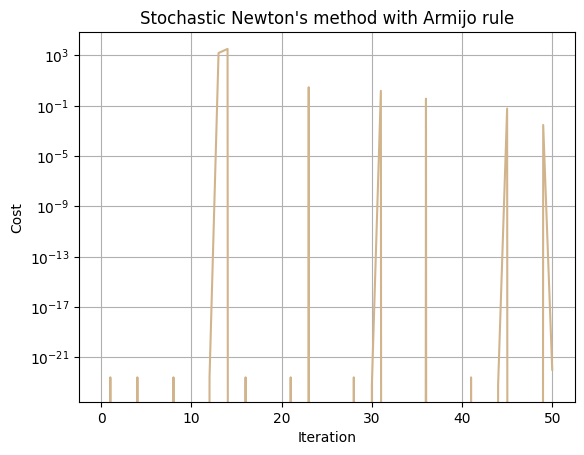

In [62]:
A_initial = np.zeros_like(A_ans, dtype=np.float64)
Stochastic_GD_A, stochastic_foo_values = stochastic_GD_with_armijo(A_initial, x_dataset, B_with_noise)
print(Stochastic_GD_A)

plt.plot(range(len(stochastic_foo_values)), stochastic_foo_values, color="tan")
plt.xlabel('Iteration')
plt.yscale('log')
plt.ylabel('Cost')
plt.title('Stochastic Newton\'s method with Armijo rule')
plt.grid(True)
plt.show()